In [1]:
from tensorflow.keras.models import model_from_json
import os
import numpy as np
from PIL import Image
from IPython.display import clear_output
import time

%run ../utils/object_detection_utils.ipynb
%run ../utils/image_utils.ipynb
%run ../utils/data_utils.ipynb
%run ./variables.ipynb
%run ./utils.ipynbs

inv_id_map = {v: k for k, v in get_selected_taxons(SELECTED_TAXONS).items()} 
id_map  = get_selected_taxons(SELECTED_TAXONS)

FileNotFoundError: [Errno 2] No such file or directory: '../selected_taxons.txt'

In [3]:
json_file = open("./saved_models/model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("./saved_models/model.h5")

In [4]:
files, labels = get_dataset()

'185/185'

/mnt/nvme-storage/pfauregi/datasets/augmented/balanced/SLAC/SLAC_13_467.png


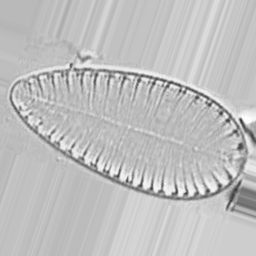

Prediction: SLAC
215


In [6]:
i = 400
sample = load_image(files[i])
thumbails_batch = []
thumbails_batch.append(sample.astype('float32')/255)
thumbails_batch = np.array(thumbails_batch)
out = loaded_model.predict(thumbails_batch, use_multiprocessing=True)
# printng
print(files[i])
display(Image.fromarray(sample))
print("Prediction:",inv_id_map[np.argmax(out)])
print(np.argmax(out))

0.9999988